In [2]:
# Import the FEMSystem Class from directory above
import sys
sys.path.append('..')
from FEMSystem import FEMSystem

import jax.numpy as jnp
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [3]:
separations = np.arange(1,10,0.5)

ratios = []
integrated_volumes = []

for sep in separations:
    with open(f"./allplots/sweep3/Separation {sep}/results.pkl", 'rb') as f:
        pickled_obj= pickle.load(f)
        print("Pickled object loaded",sep)
        E_J,E_C,e_0 = pickled_obj["E_J"],pickled_obj["E_C"],pickled_obj["e0"]
        ratios.append(E_J/E_C)
        integrated_volumes.append(pickled_obj["integrated_volume"])

Pickled object loaded 1.0
Pickled object loaded 1.5
Pickled object loaded 2.0
Pickled object loaded 2.5
Pickled object loaded 3.0
Pickled object loaded 3.5
Pickled object loaded 4.0
Pickled object loaded 4.5
Pickled object loaded 5.0
Pickled object loaded 5.5
Pickled object loaded 6.0
Pickled object loaded 6.5
Pickled object loaded 7.0
Pickled object loaded 7.5
Pickled object loaded 8.0
Pickled object loaded 8.5
Pickled object loaded 9.0
Pickled object loaded 9.5


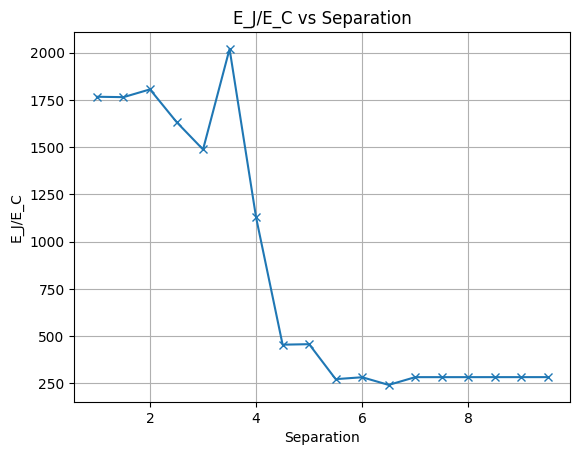

In [5]:
plt.plot(separations,ratios,"x-")
plt.xlabel("Separation")
plt.ylabel("E_J/E_C")
plt.title("E_J/E_C vs Separation")
plt.grid(True)

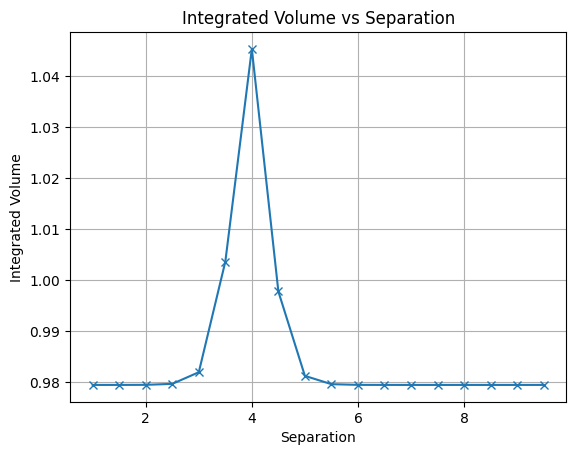

: 

In [ ]:
real_volume = 25**3 * 2

volume_ratios = np.array(integrated_volumes) / real_volume

plt.plot(separations,volume_ratios,"x-")
plt.xlabel("Separation")
plt.ylabel("Integrated Volume")
plt.title("Integrated Volume vs Separation")
plt.grid(True)

In [2]:
pickled_obj = {}

with open('./allplots/smoothtest/results.pkl', 'rb') as f:
    pickled_obj= pickle.load(f)

femsystem:FEMSystem = pickled_obj["femsystem"]
femsystem.saveFigsDir = None # Turn OFF saving plots
u_even,u_odd = pickled_obj["u_even"],pickled_obj["u_odd"]
u_even_interior,u_odd_interior = u_even[femsystem.interior_dofs],u_odd[femsystem.interior_dofs]
theta_at_dofs = pickled_obj["theta_at_dofs"]
theta_at_interior = theta_at_dofs[femsystem.interior_dofs]
n,coeffs = pickled_obj["n"],pickled_obj["coeffs"]
E_J,E_C,e_0 = pickled_obj["E_J"],pickled_obj["E_C"],pickled_obj["e0"]

print(f"EJ: {E_J}, EC: {E_C}, EJ/EC: {E_J/E_C}")

EJ: 0.5560226440429688, EC: 0.0019604407716542482, EJ/EC: 283.6212463378906


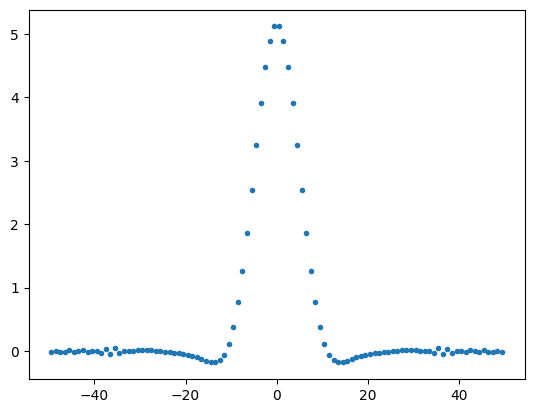

In [3]:
x = (n-1)/2 - jnp.arange(n)
plt.plot(x,coeffs,".")
# femsystem.plot_at_inteRior_2d(theta_at_dofs[femsystem.interior_dofs])
# femsystem.plot_at_interior_2d_in3d(u_odd_interior,plot_title="Odd Mode")
# femsystem.plot_at_interior_2d_in3d(u_even_interior,plot_title="Even Mode")

V min to max: -0.0075831623 0.0075831623


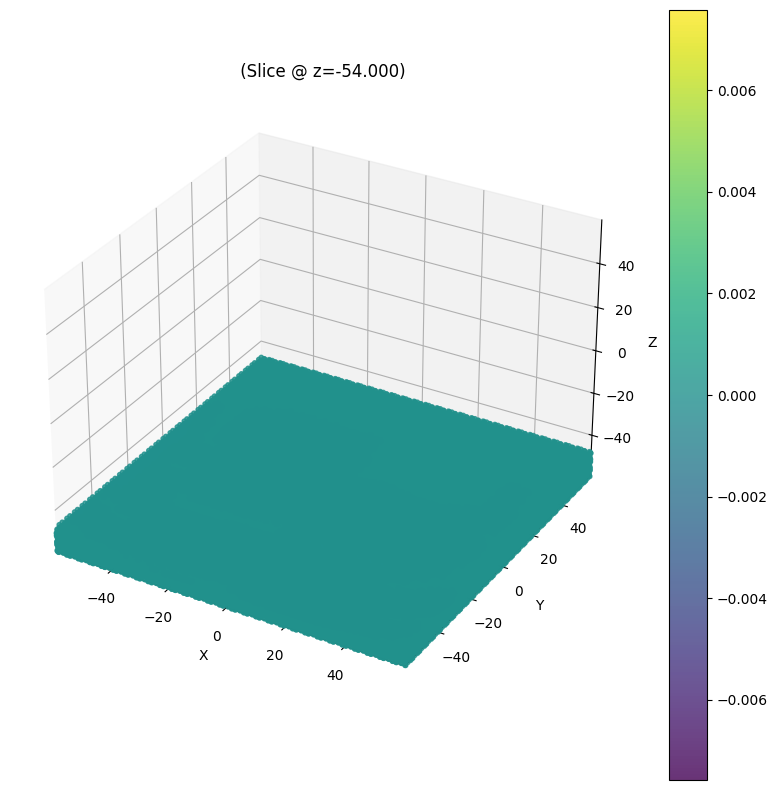

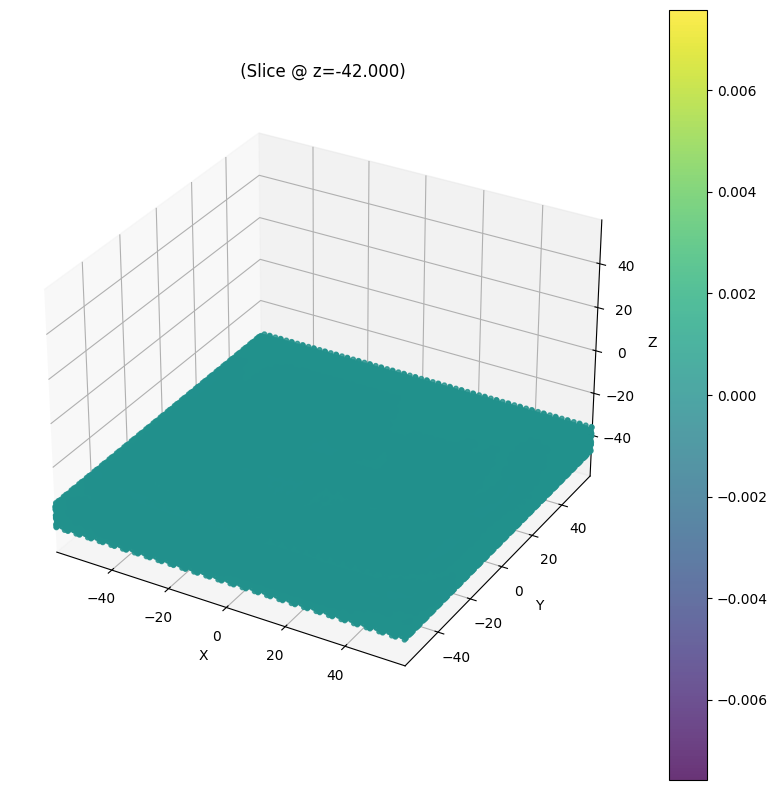

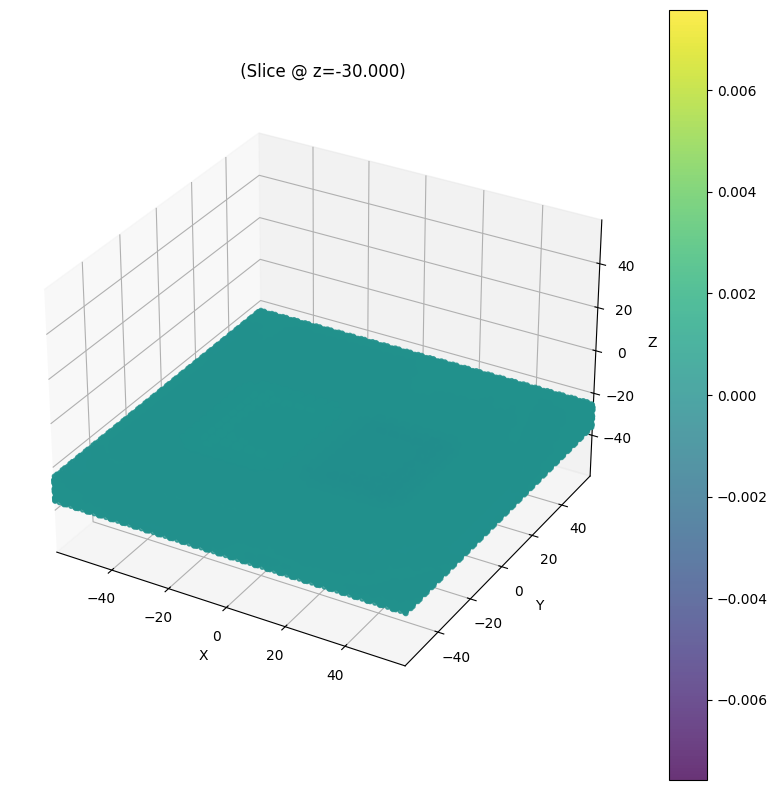

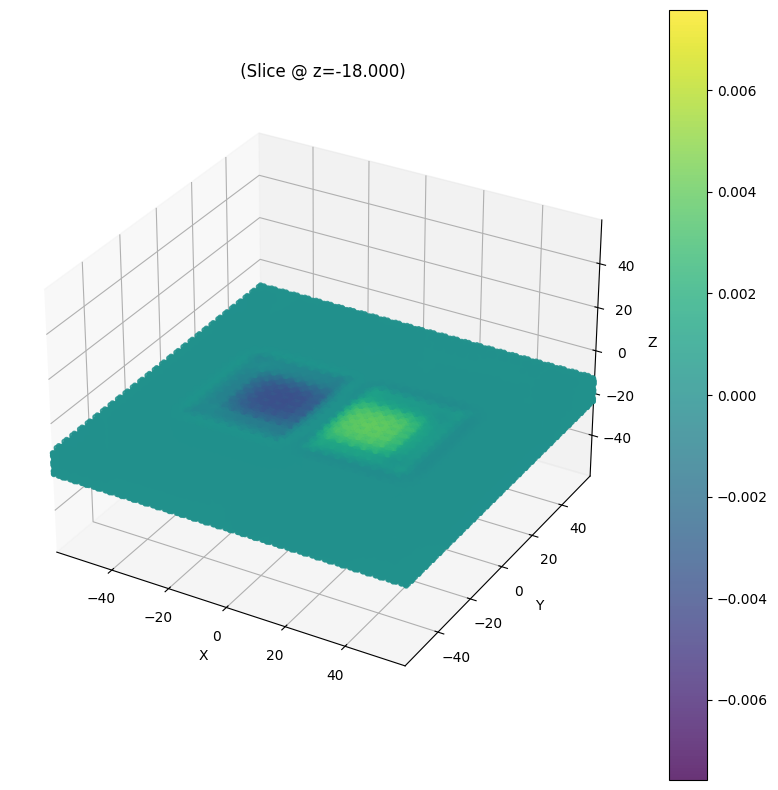

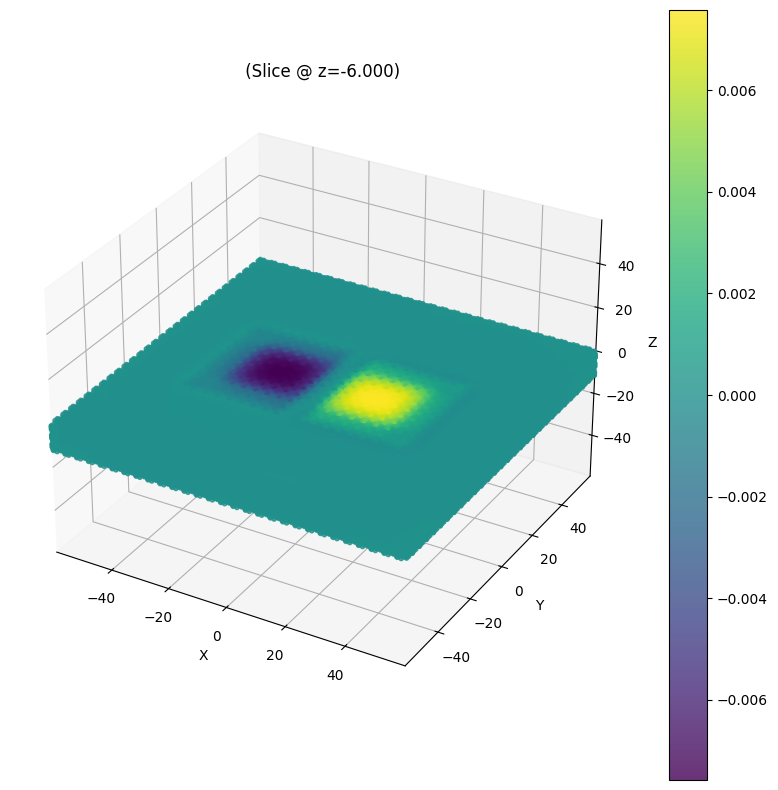

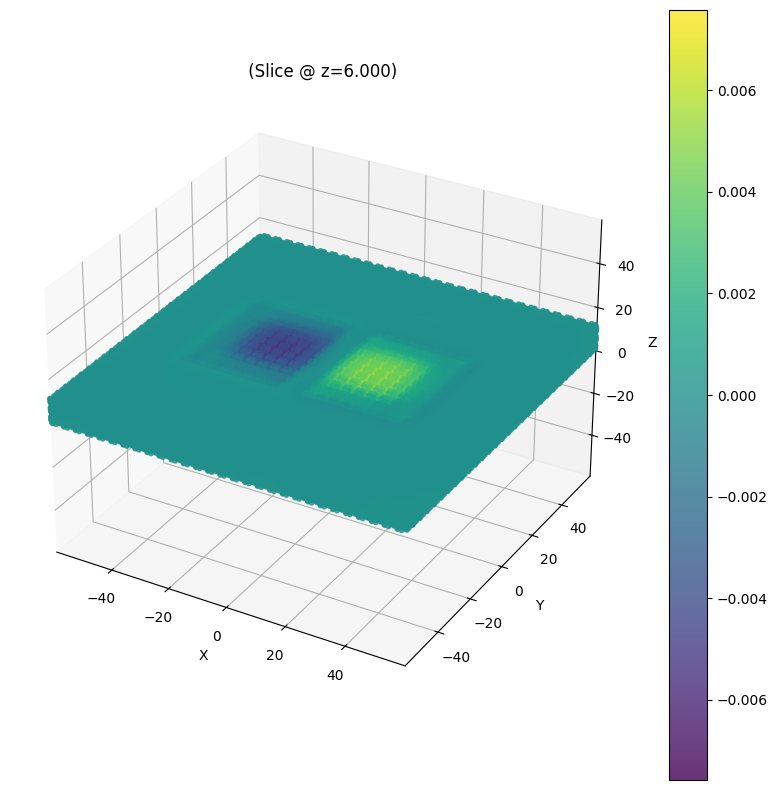

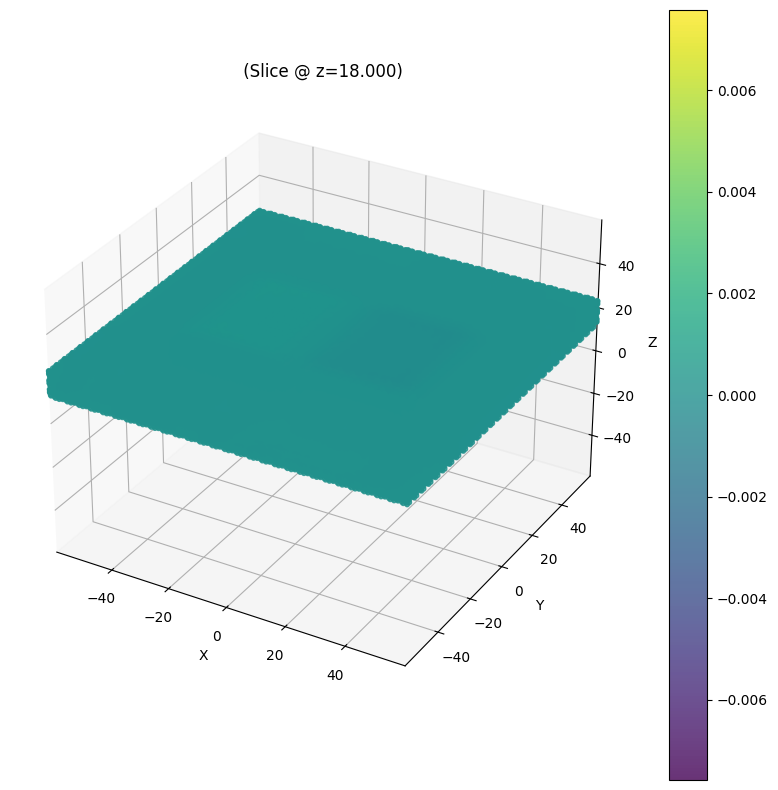

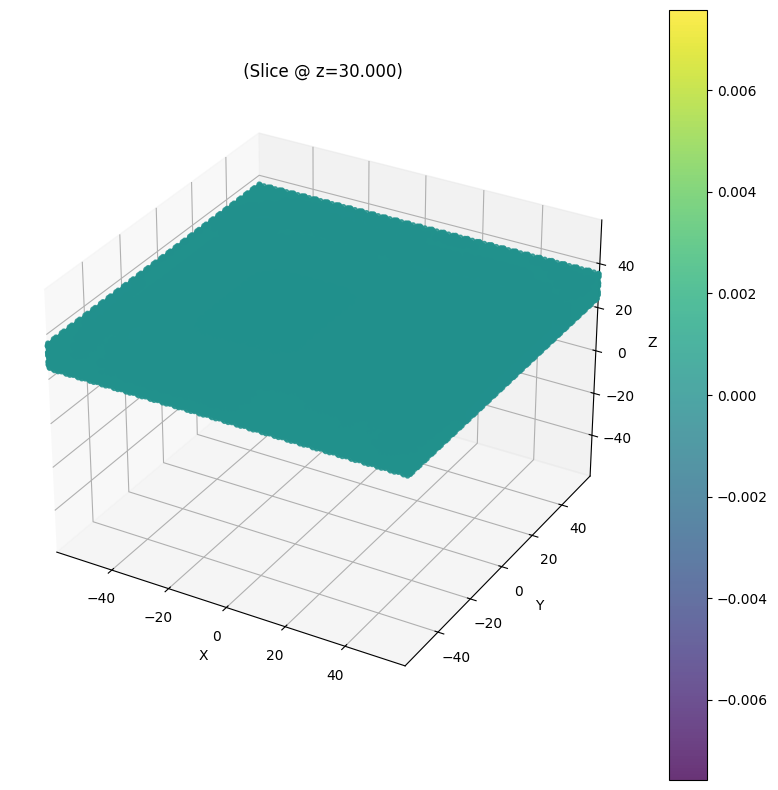

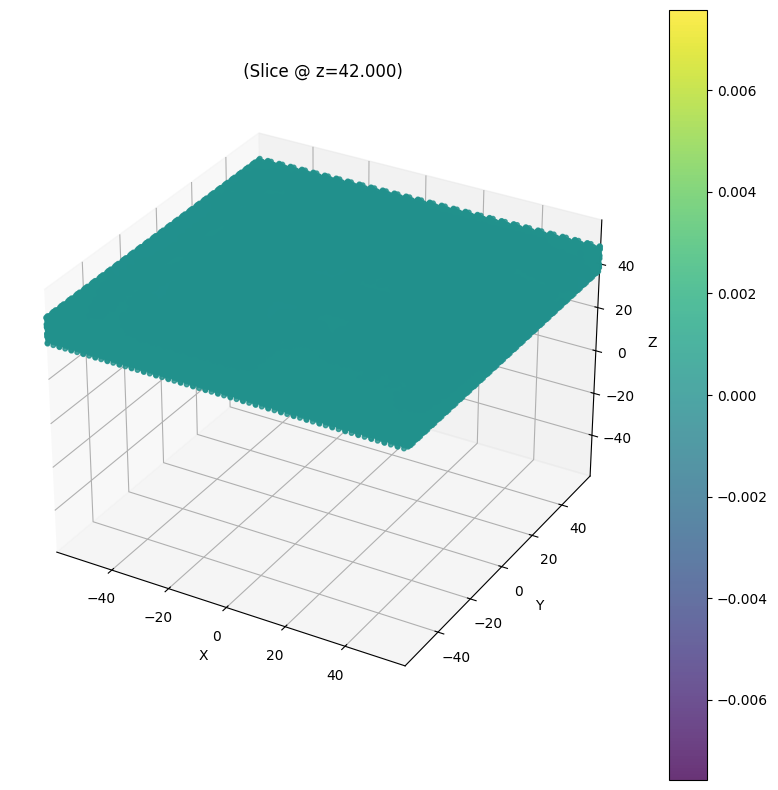

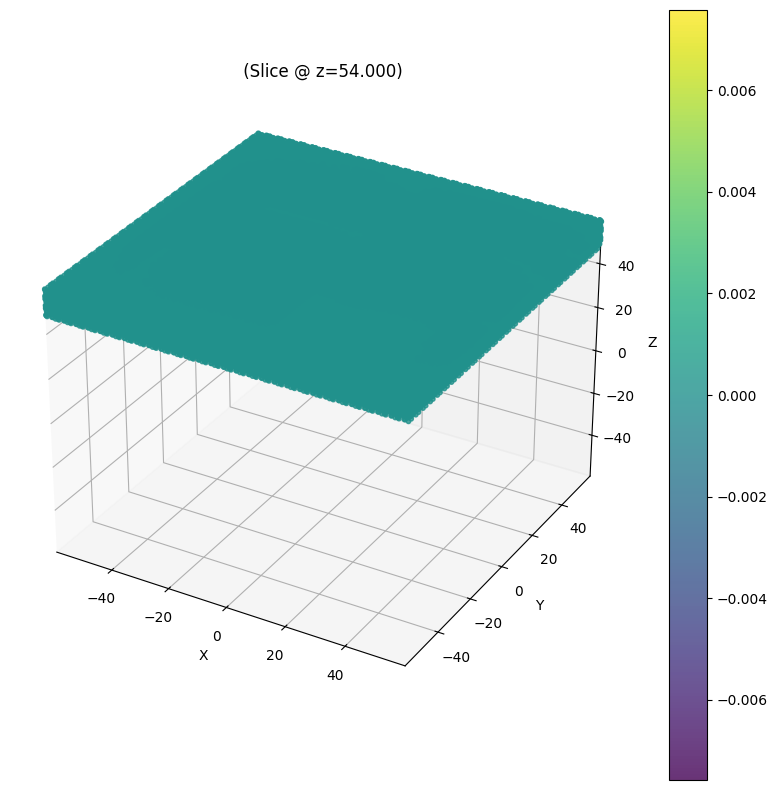

In [4]:
femsystem.plot_n_slices_interior(u_odd_interior,n_slices=10)

V min to max: -1.1554481e-05 0.0067858044


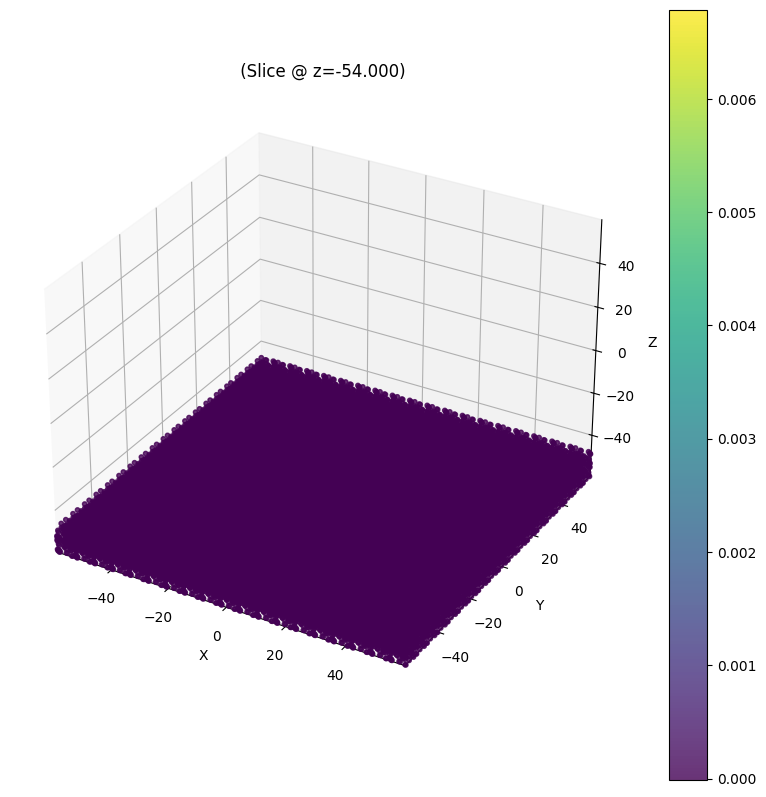

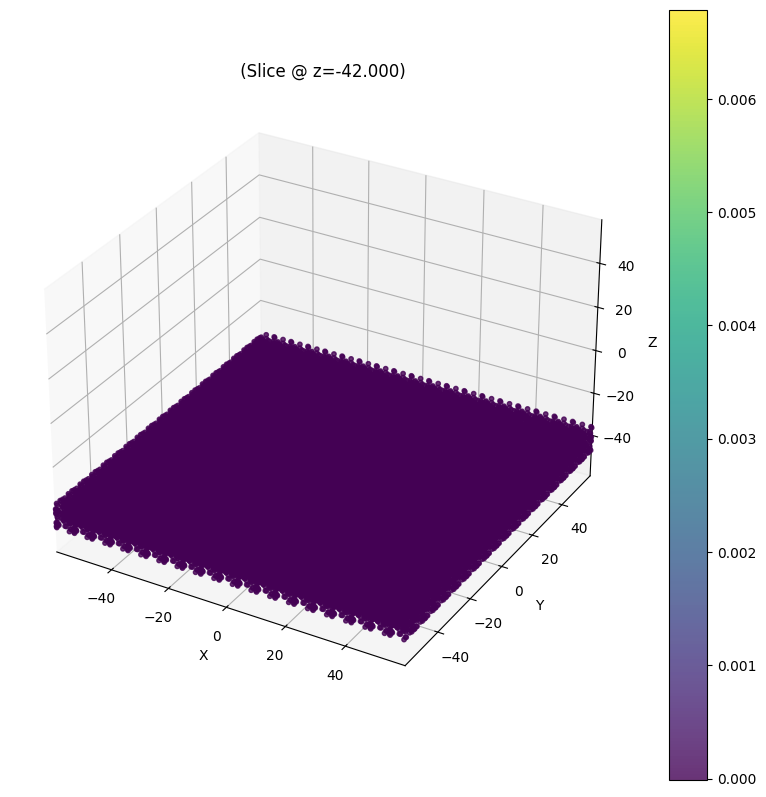

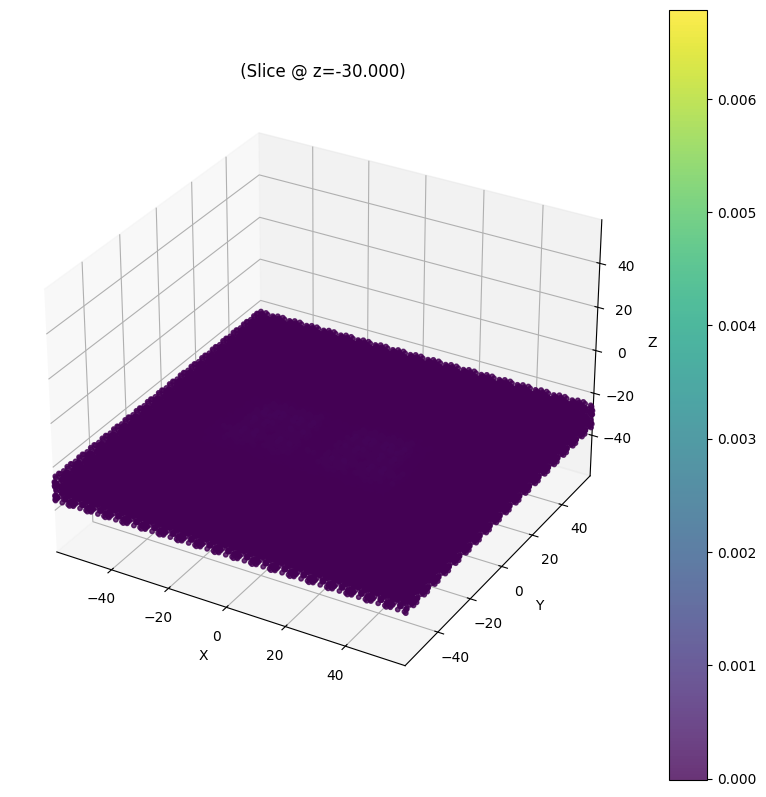

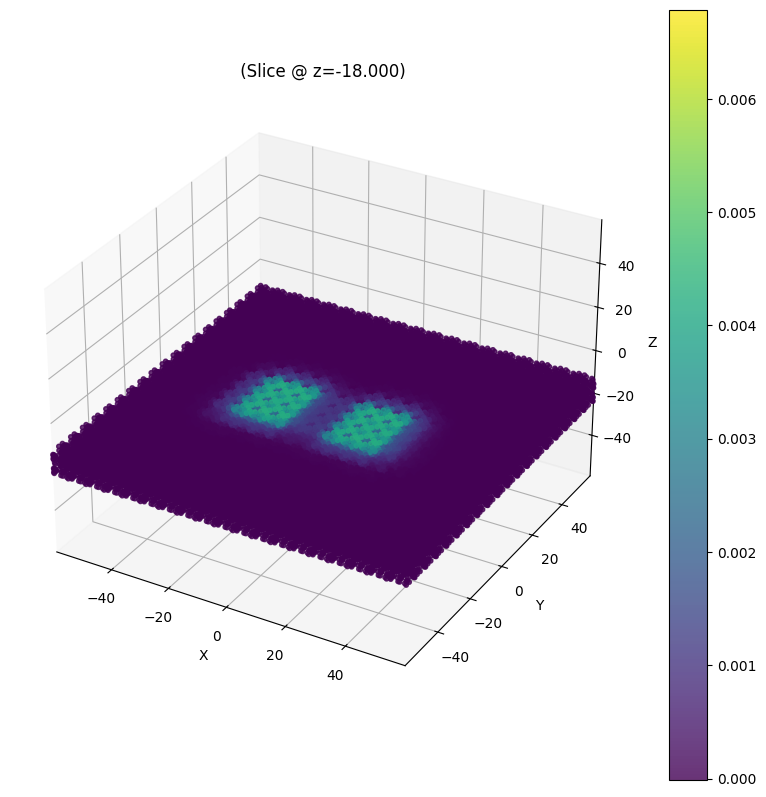

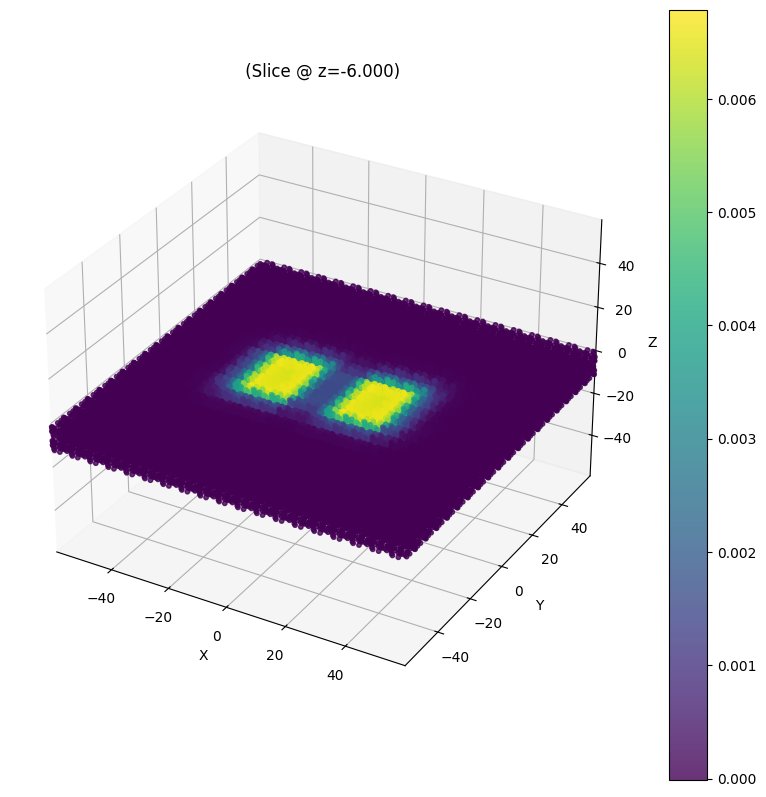

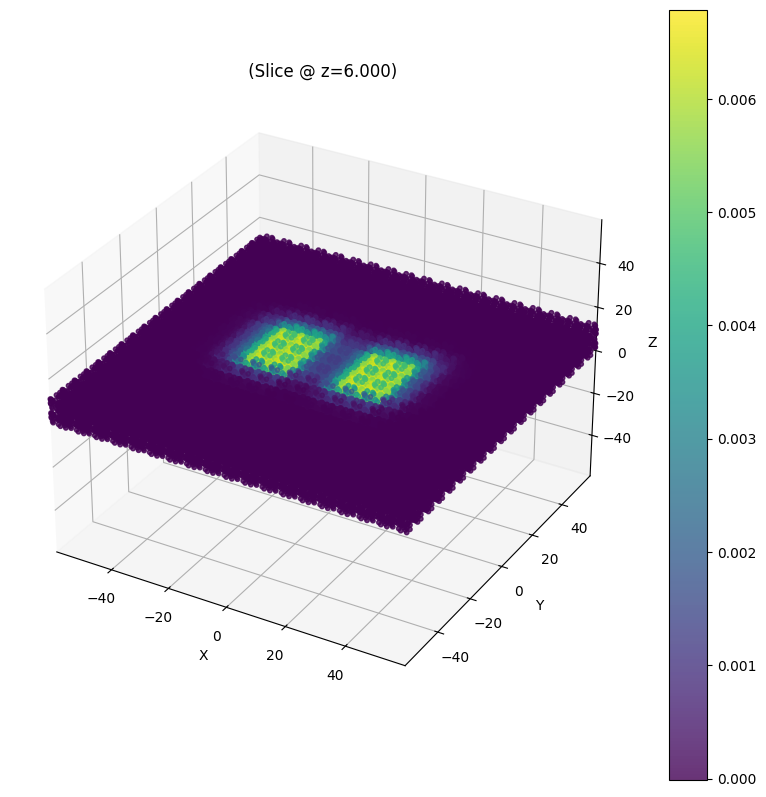

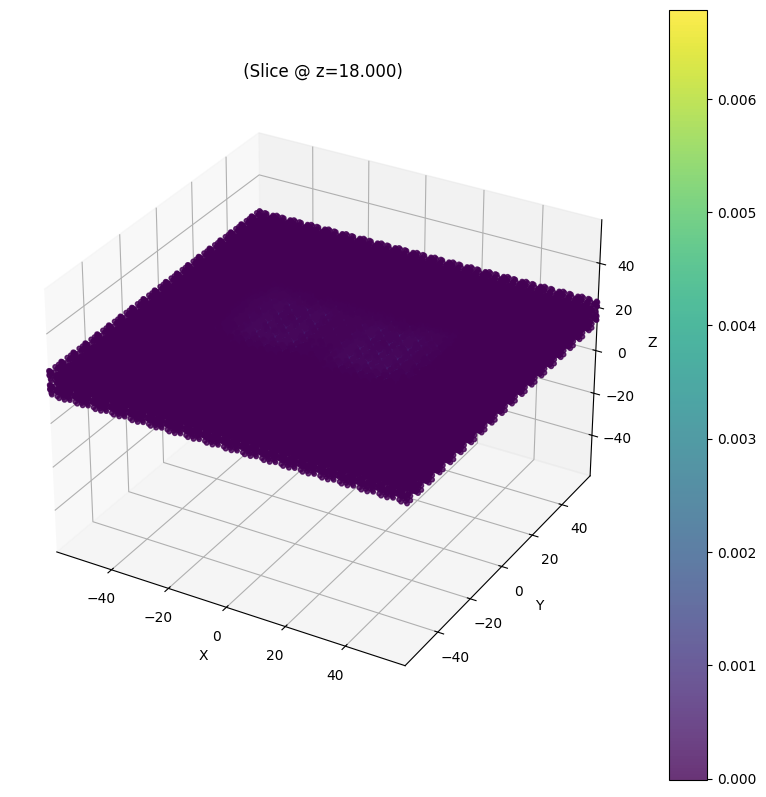

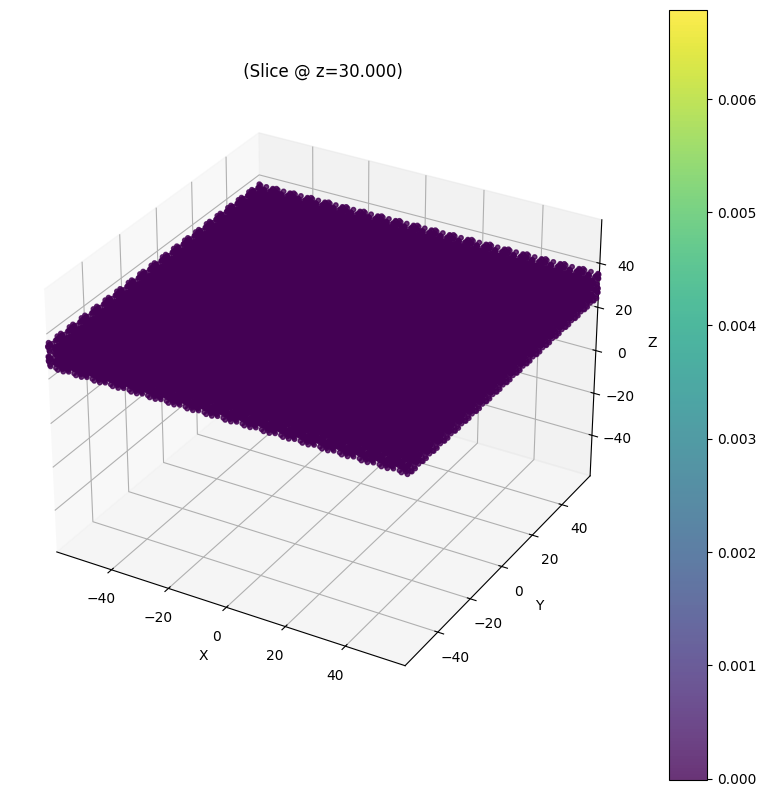

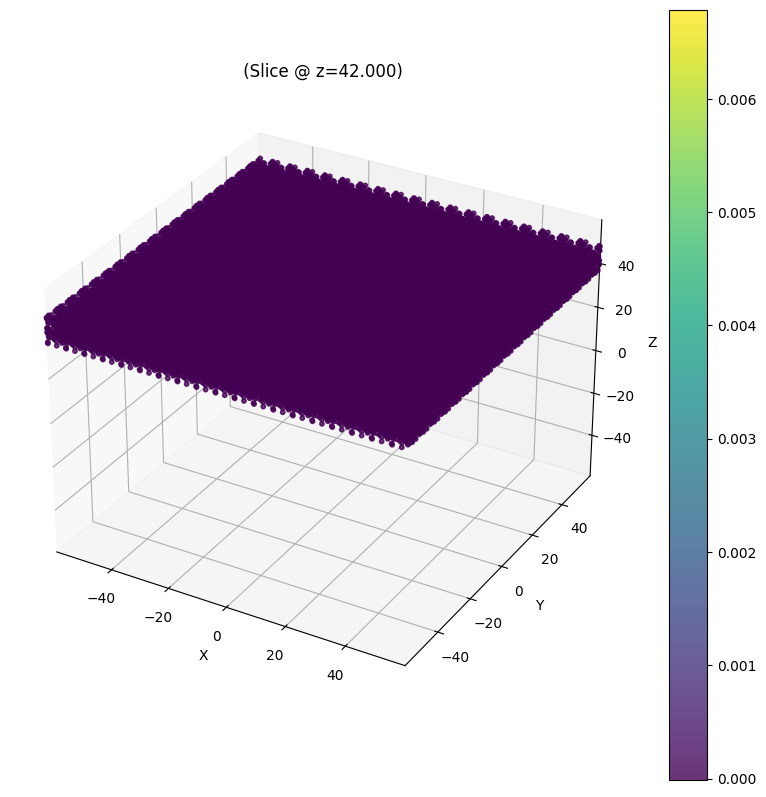

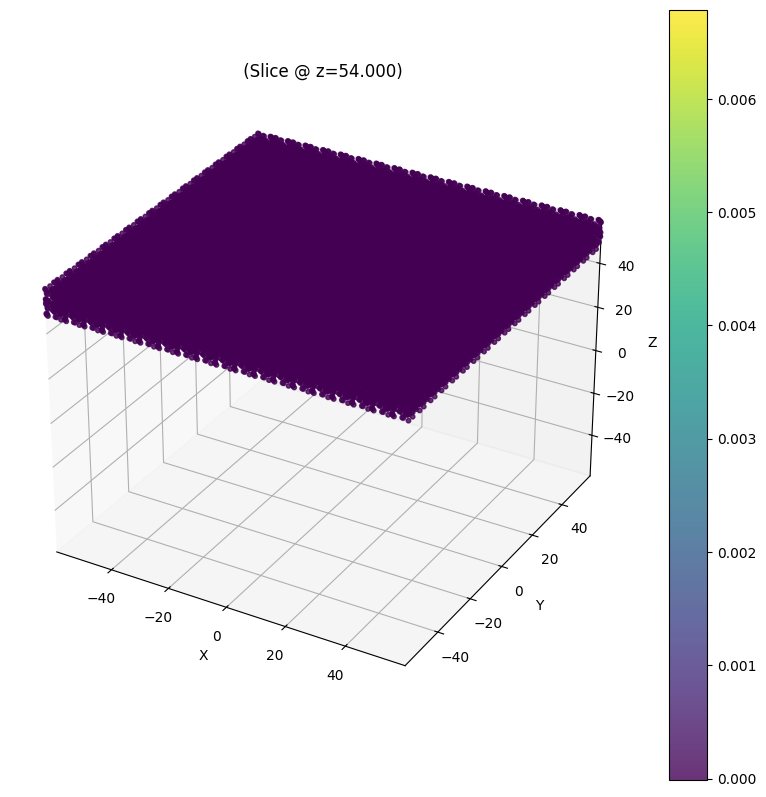

In [9]:
femsystem.plot_n_slices_interior(u_even_interior,n_slices=10)

# Plot the Geometry

V min to max: 0.0 1.0


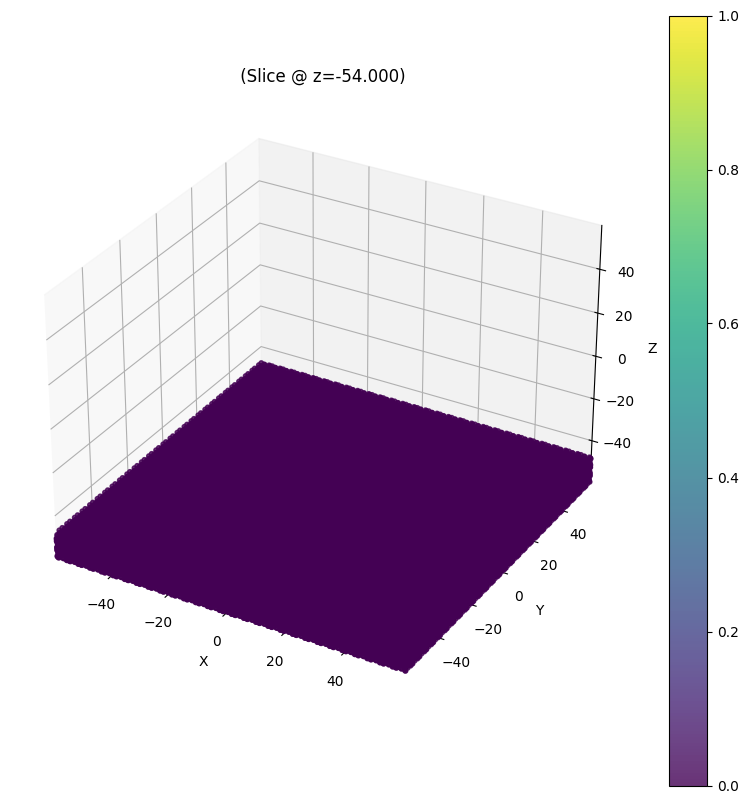

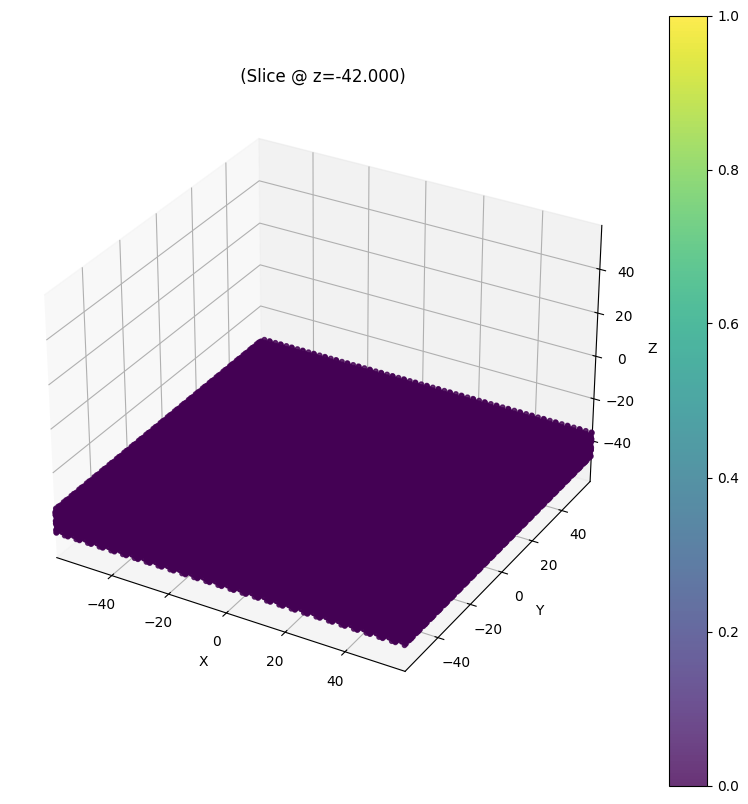

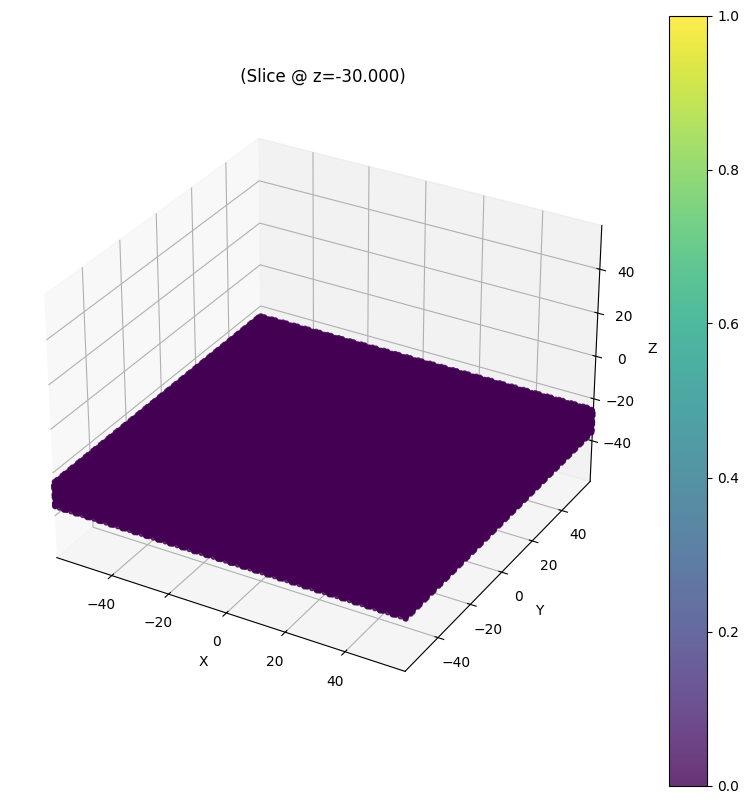

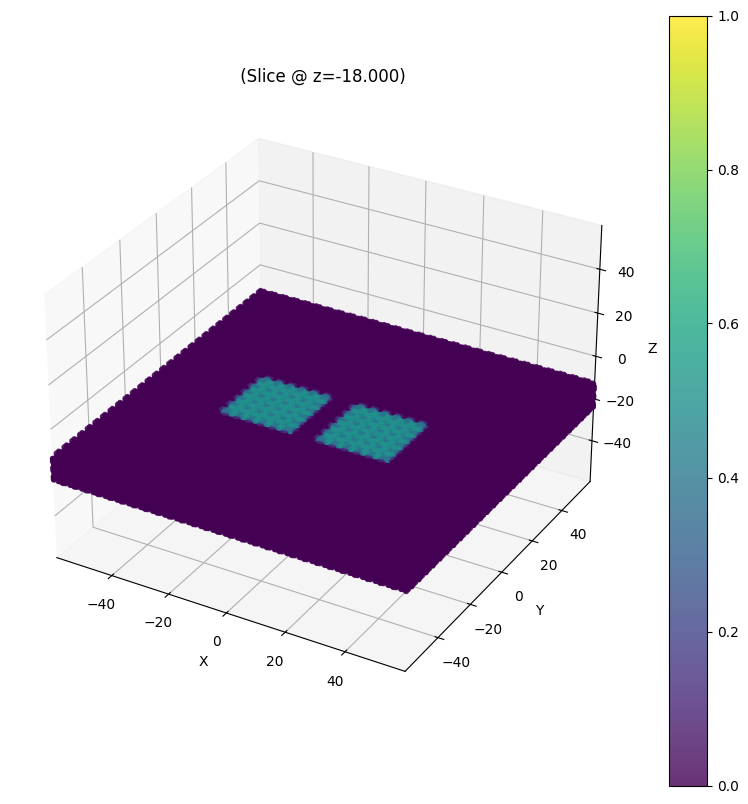

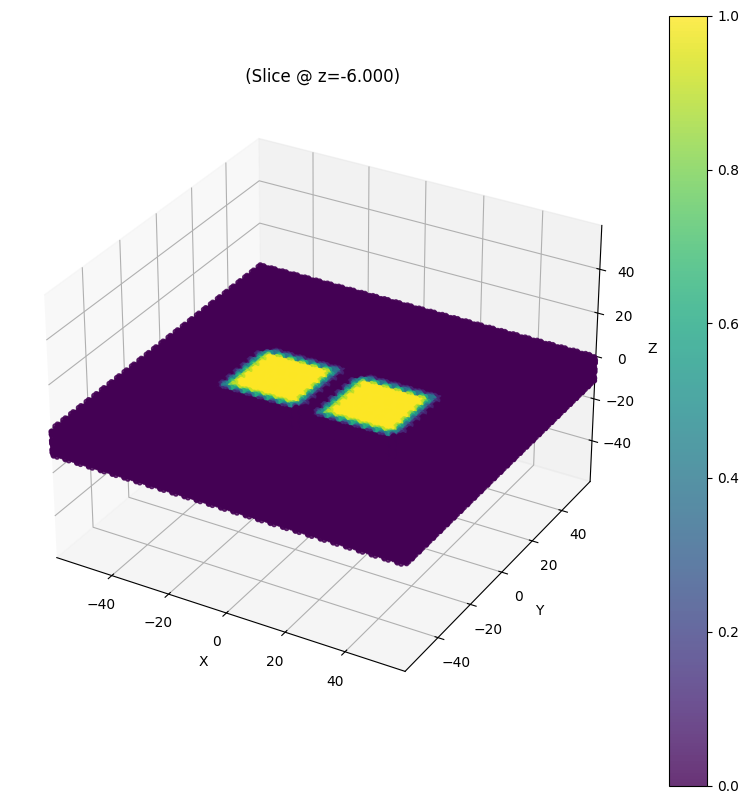

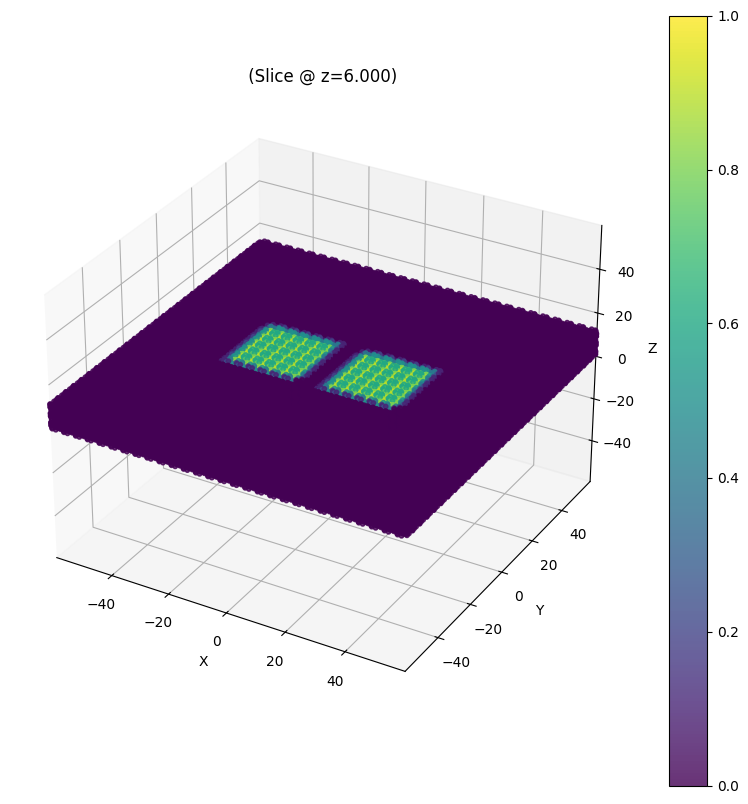

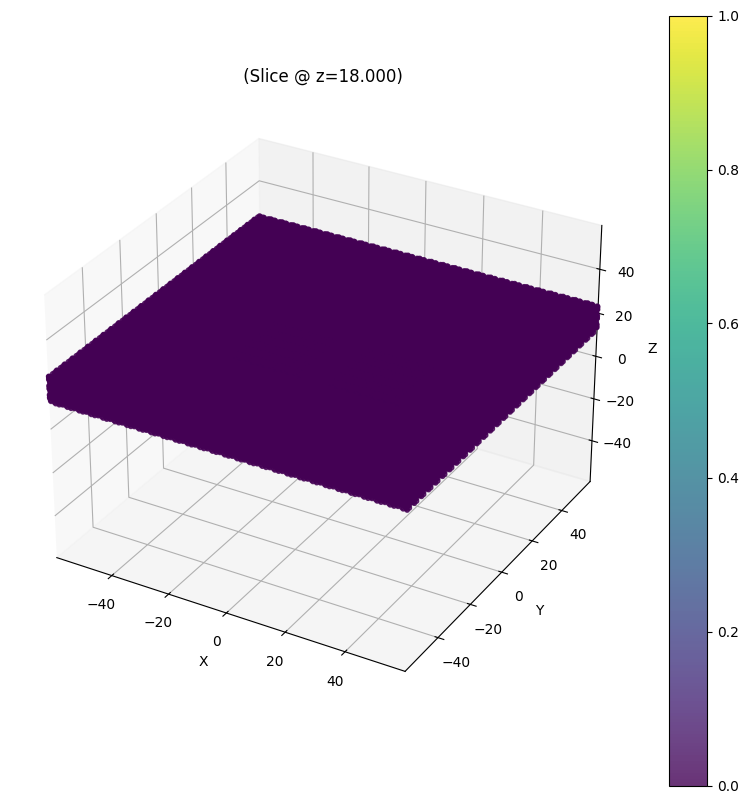

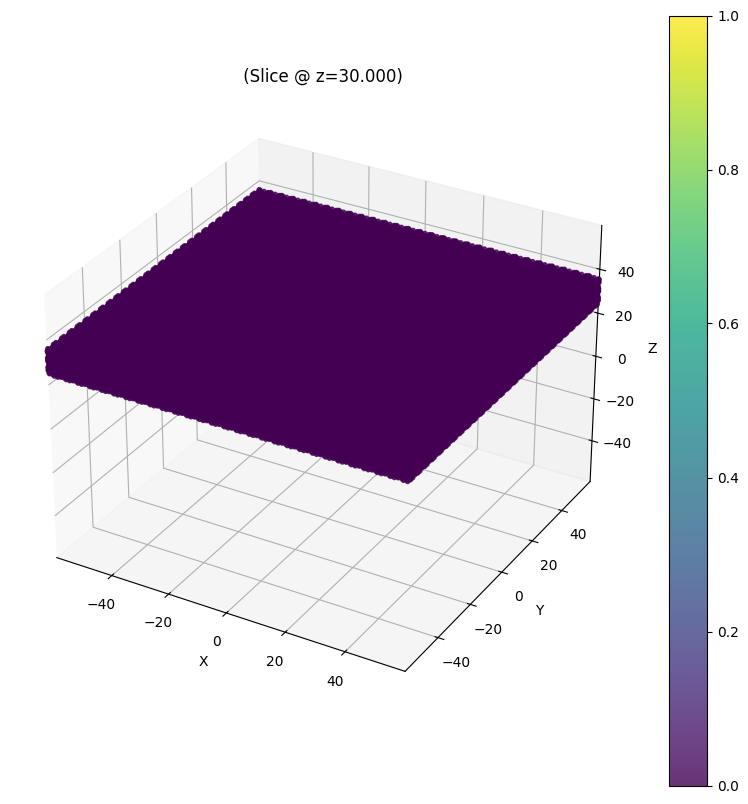

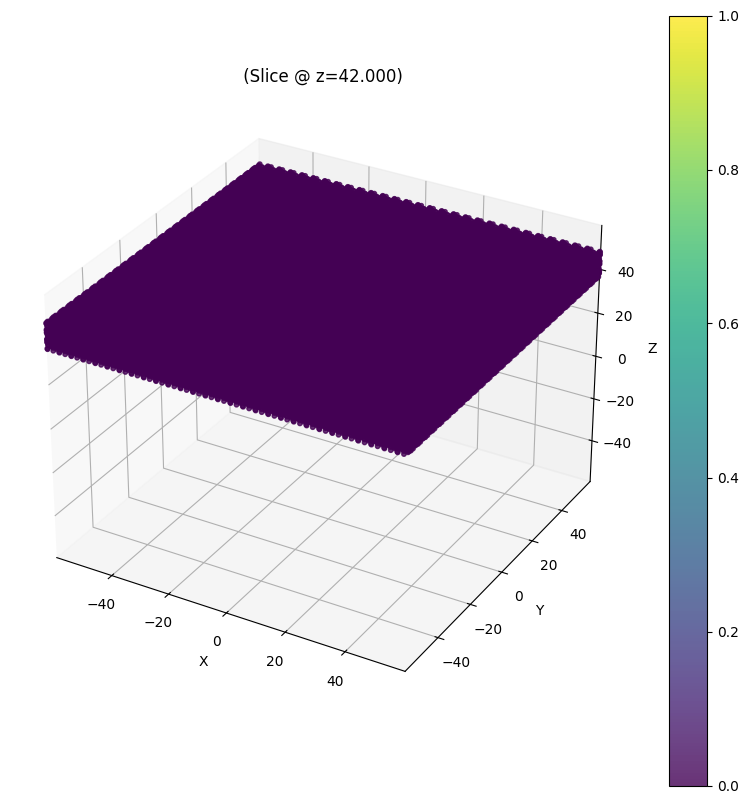

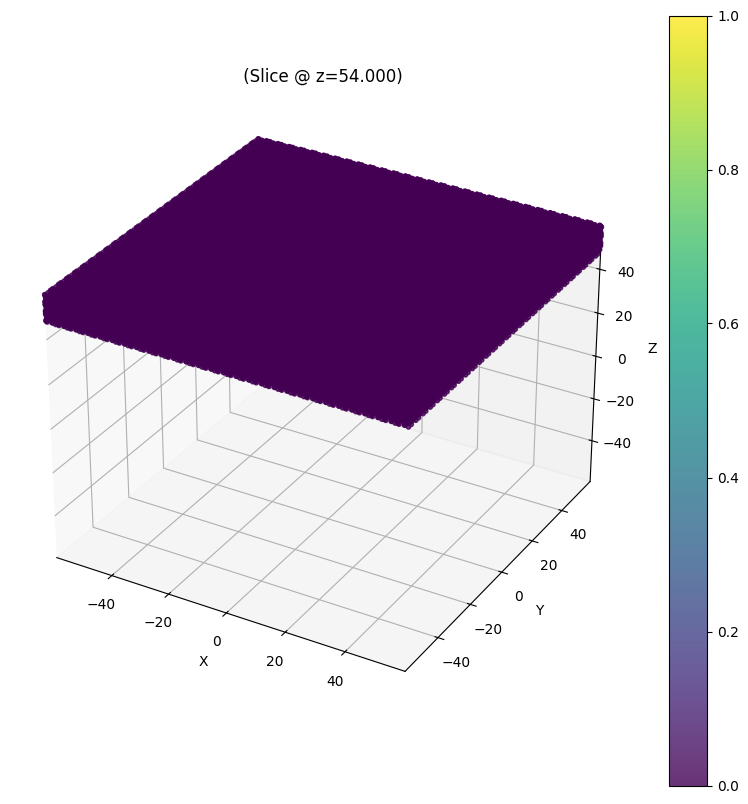

: 

In [ ]:
femsystem.plot_n_slices_interior(theta_at_interior,n_slices=10)